In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from ase.visualize.plot import plot_atoms
from ase.io import read

In [2]:
formulas = [
    'H2O',
    'H2'
]

In [3]:
xc = 'RPBE' # 'PW91', 'PBE', 'RPBE'
encut = 400 # 400, 520
ispin = 2 # 1, 2
ivdw = 0 # 0, 10, 11, 12
concentration = 0 # 0.0, 0.1, 1.0

In [4]:
data = pd.read_csv('data/gas_phase.csv')
data = data[(data.xc==xc)&(data.encut==encut)&(data.ispin==ispin)&(data.ivdw==ivdw)&(data.concentration==concentration)]

H2O
H2


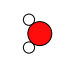

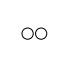

In [5]:
for formula in formulas:
    print(formula)
    i = data.set_index('formula')['Unnamed: 0'][formula]
    atoms = read('data/gas_phase.json', i-1)
    atoms.rotate(90, 'y')

    plt.figure(figsize=(1, 1))
    ax = plt.gca()
    plot_atoms(atoms, ax=ax, show_unit_cell=1, bbox=[6, 6, 9, 9])
    ax.axis('off')
    plt.savefig(f'{formula}.svg', bbox_inches='tight')